# Model Visualization

This notebook relies on functions from "model.py" and "equations.py" to recreate Figure 1bc from the paper, which depict the mean vitality of a population of networks for different repair strategies and model parameter values. Additionally, there is code for visualizing Figure S1 which showcases properties of complex network aging such as the dependence of failures times $t_c$, repairable fraction $h(\phi,I)$, probability of a final vital provider $m(I,\phi$), and failure cascade on interdependence $I$.

Included here are codes for Figure 1 of the main text along with several Supplementary figures.

In [1]:
from model import *
from ode_solver import *

### Test Run

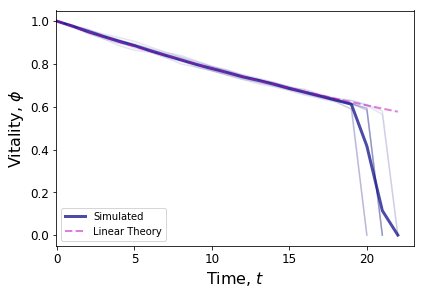

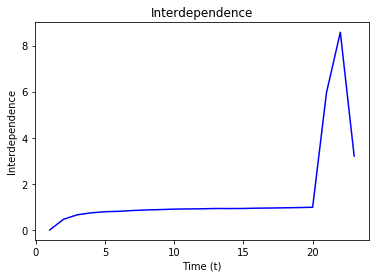

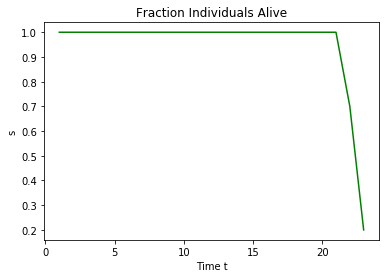

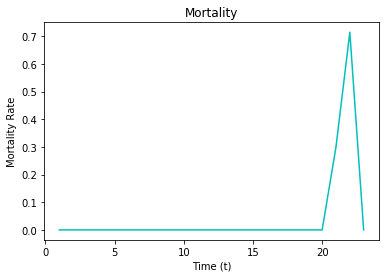

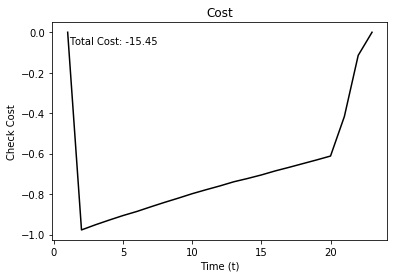

In [2]:
cost = simPopulation('test', pop_size=10, N=1000, p=0.1, d=0, f=0.025, r=0, f_thresh=0.01,
    graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
    costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
    node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
    P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,save='no')

## Figure 1b: Comparison of analytic theory and simulated vitality

In [5]:
f=0.025
r=0
alpha=10
phi0 = 1
I_list = [0.5]
n = round(0.1*(999))
t = np.linspace(0, 100, 101)
colors = ['r', 'b', 'g', 'm', 'c', 'k', '#BD8460', '#800080', '#8B0000' ,'g']

sols = []
for I in I_list:
    sol = odeint(dphi_dt, phi0, t, args=(I, f, r, alpha, n), tfirst=True)
    sols.append(sol)

C:\Users\edsun\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [3]:
cost = simPopulation('Gilbert8', pop_size=50, N=1000, p=0.1, d=0, f=0.025, r=0, f_thresh=0.01,
    graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
    costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
    node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
    P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,save='yes',plot='no',write_inds='yes')

Saving results...


In [3]:
cost = simPopulation('Gilbert8N100', pop_size=100, N=100, p=0.1, d=0, f=0.025, r=0, f_thresh=0.01,
    graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
    costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
    node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
    P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,save='yes',plot='no',write_inds='yes')

Saving results...


$ N=1000 $

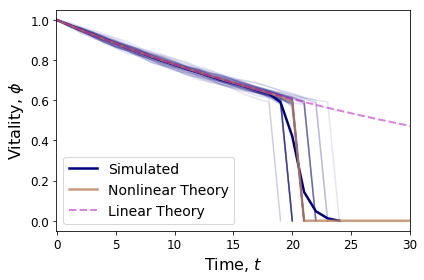

In [11]:
simulated_vits = []
for fn in os.listdir('./Data/'):
    if 'Gilbert8binary' in fn:
        if 'MEAN' in fn:
            mean_vit = np.genfromtxt('./Data/'+fn,delimiter=',')
        else:
            simulated_vits.append(np.genfromtxt('./Data/'+fn,delimiter=',')[0,:])

for i, vit in enumerate(simulated_vits):
    if i == 0:
        plt.plot(np.arange(0,len(vit),1), vit, color='#000080', alpha=0.1)#, label='Simulated')
    else:
        plt.plot(np.arange(0,len(vit),1), vit, color='#000080', alpha=0.1)

plt.plot(np.arange(0,len(mean_vit[0,:]),1), mean_vit[0,:],linewidth=2.5,color='#000080',label='Simulated')


# Find where solution diverges
itemindex = np.where((sols[0]<0) | (sols[0]>1))
#itemindex = np.where((sols[0]<0.45) | (sols[0]>1)) # for non-divergent sol
dead = itemindex[0][0]-1

# Enforce bounds
adjusted_sol = np.zeros(sols[0].shape[0])
adjusted_sol[:dead] = sols[0][:dead,0]

# Plot
plt.plot(t,adjusted_sol,linewidth=2.5,color='#BD8460',alpha=0.8,label='Nonlinear Theory')
r=0
vitality_theory = [(np.exp((-f-r)*(time-1))*(f+np.exp((f+r)*(time-1))*r))/(f+r) for time in t]
plt.plot([time-1 for time in t], vitality_theory, color='m', linestyle='--', alpha=0.5, linewidth=2.0, label='Linear Theory')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Time, $t$", fontsize=16)
plt.ylabel("Vitality, $\phi$", fontsize=16)
plt.ylim([-0.05,1.05])
plt.xlim([-0.05, 30])
plt.legend(loc='lower left',fontsize=14)
plt.tight_layout()
filename = 'GilbertFullModel2'
plt.savefig('Figures/'+filename+'_vitality', dpi=800)
plt.show()

$ N=100 $

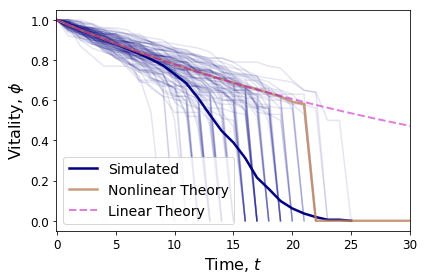

In [7]:
simulated_vits = []
for fn in os.listdir('./Data/'):
    if 'Gilbert8N100binary' in fn:
        if 'MEAN' in fn:
            mean_vit = np.genfromtxt('./Data/'+fn,delimiter=',')
        else:
            simulated_vits.append(np.genfromtxt('./Data/'+fn,delimiter=',')[0,:])

for i, vit in enumerate(simulated_vits):
    if i == 0:
        plt.plot(np.arange(0,len(vit),1), vit, color='#000080', alpha=0.1)#, label='Simulated')
    else:
        plt.plot(np.arange(0,len(vit),1), vit, color='#000080', alpha=0.1)

plt.plot(np.arange(0,len(mean_vit[0,:]),1), mean_vit[0,:],linewidth=2.5,color='#000080',label='Simulated')


# Find where solution diverges
itemindex = np.where((sols[0]<0) | (sols[0]>1))
#itemindex = np.where((sols[0]<0.45) | (sols[0]>1)) # for non-divergent sol
dead = itemindex[0][0]-1

# Enforce bounds
adjusted_sol = np.zeros(sols[0].shape[0])
adjusted_sol[:dead] = sols[0][:dead,0]

# Plot
plt.plot(t,adjusted_sol,linewidth=2.5,color='#BD8460',alpha=0.8,label='Nonlinear Theory')
r=0
vitality_theory = [(np.exp((-f-r)*(time-1))*(f+np.exp((f+r)*(time-1))*r))/(f+r) for time in t]
plt.plot([time-1 for time in t], vitality_theory, color='m', linestyle='--', alpha=0.5, linewidth=2.0, label='Linear Theory')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Time, $t$", fontsize=16)
plt.ylabel("Vitality, $\phi$", fontsize=16)
plt.ylim([-0.05,1.05])
plt.xlim([-0.05, 30])
plt.legend(loc='lower left',fontsize=14)
plt.tight_layout()
filename = 'GilbertFullModel2N100'
plt.savefig('Figures/'+filename+'_vitality', dpi=800)
plt.show()

## Figure S1 (supplementary material)

C:\Users\edsun\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


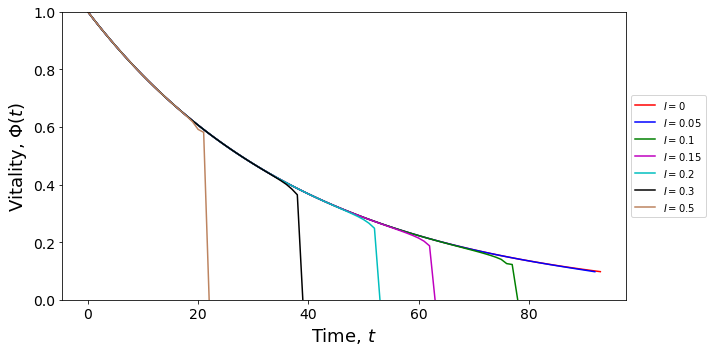

In [16]:
f=0.025
r=0
alpha=20
phi0 = 1
I_list = [0,0.05,0.1,0.15,0.2, 0.3 ,0.5]#,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n = round(0.1*(999))
t = np.linspace(0, 100, 101)
colors = ['r', 'b', 'g', 'm', 'c', 'k', '#BD8460', '#800080', '#8B0000' ,'g']

sols = []
for I in I_list:
    sol = odeint(dphi_dt, phi0, t, args=(I, f, r, alpha, n), tfirst=True)
    sols.append(sol)

plt.figure(figsize=(10,5))
for i, sol in enumerate(sols):
    idx = np.argmax(sol<=0.1)
    new_sol = sol[:idx+1,:]
    plt.plot(t[:idx+1], new_sol, colors[i], label='$I=$'+str(I_list[i]))
plt.xlabel('Time, $t$', fontsize=18)
plt.ylabel('Vitality, '+r'$\Phi(t)$', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('phi_nonlin.png',dpi=800,bbox_inches='tight')
plt.show()

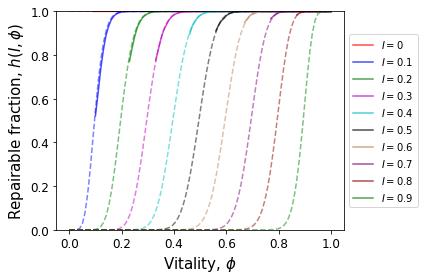

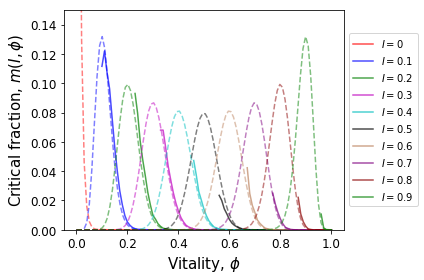

In [20]:
colors = ['r', 'b', 'g', 'm', 'c', 'k', '#BD8460', '#800080', '#8B0000' ,'g']

phi_range = np.linspace(0,1,100)

from operator import itemgetter
for j, I_key in enumerate(sorted(I_h_dict)):
    label = '$I=$'+I_key
    vits = []
    hs = []
    for v_key in I_h_dict[I_key]:
        if float(v_key) != 0.0: # TAKE OUT ZERO VITALITY (sharp jumps, 11/28/2019)
            vits.append(float(v_key))
            hs.append(float(I_h_dict[I_key][v_key]))
    double_list = [list(x) for x in zip(*sorted(zip(vits, hs), key=itemgetter(0)))]
    vits = double_list[0]
    hs = double_list[1]
    plt.plot(vits, hs, label=label, alpha=0.7, color=colors[j])
    plt.plot(phi_range, get_h(float(I_key),phi_range,100), alpha=0.5, linestyle='--', color=colors[j])
plt.xlabel('Vitality, $\phi$', fontsize=15)
plt.ylabel('Repairable fraction, $h(I,\phi)$', fontsize=15)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('hI_test.png',dpi=800,bbox_inches='tight')
plt.show()

for j, I_key in enumerate(sorted(I_m_dict)):
    label = '$I=$'+I_key
    vits = []
    ms = []
    for v_key in I_m_dict[I_key]:
        if float(v_key) != 0.0: # TAKE OUT ZERO VITALITY (sharp jumps, 11/28/2019)
            vits.append(float(v_key))
            ms.append(float(I_m_dict[I_key][v_key]))
    double_list = [list(x) for x in zip(*sorted(zip(vits, ms), key=itemgetter(0)))]
    vits = double_list[0]
    ms = double_list[1]
    plt.plot(vits, ms, label=label, alpha=0.7, color=colors[j])
    plt.plot(phi_range, get_m(float(I_key),phi_range,100), alpha=0.5, linestyle='--', color=colors[j])
plt.xlabel('Vitality, $\phi$', fontsize=15)
plt.ylabel('Critical fraction, $m(I,\phi)$', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,0.15)
plt.tight_layout()
plt.savefig('mI_test.png',dpi=800,bbox_inches='tight')
plt.show()

In [10]:
######
alpha = 10
r = 0
f = 0.025
N = 100
p = 0.1
graph_type = 'Grandom_s'
######

d=0
f_thresh=0.1
weight_type='uniform'
check_type='none'
kinetic=1
P_check=0.01
e=0
cost_type=['basic']
costC=0
costR=0
costE=0
costD=0
costL=0, 
P_repl=0
costrepl=0
max_repl=1
repl_type='constant'
node_type='binary'
damage_type='uniform'
edge_type='binary'
f_edge=0
r_edge=0
std=0.3, 
P_ablate=0
costablate=0
ablate_type='constant'
repair_start=0
repair_end='none'
delay=0,
time_end='none'
save='no'
plot='yes'
write_inds='no'

I_list = np.linspace(0.05,1,30)
phi_c_list = []
t_c_list = []

for dependency in I_list:
    phi_c_I_list = []
    t_c_I_list = []
    for ind in range(200):
        A, v = initIndividual (N, graph_type, p, d, edge_type)

        # Initialize vector for number of nodes that the given is dependent on
        num_neigh = np.sum(A,axis=0)

        # Initialize replication counter vector
        repl_v = np.zeros(N)

        # Summary Lists
        vitality = []
        h_fraction = []
        m_fraction = []

        i = 0
        while i >= 0: # runs until all nodes broken

            # Gets weight and degree vectors
            degree_vec = getDegrees (A)
            weight_vec = getWeights (weight_type, A, v, degree_vec)

            vitality_i, interdependence_i = Analyze(v, f, r, i, weight_vec)
            vitality.append(vitality_i)            
            
            # Break if vitality lower than threshold
            if np.sum(v)/len(v) <= f_thresh or np.sum(v)==0: # stops when vitality passes threshold
                break

            # Stops data collection if time_end reaches
            if time_end != 'none' and i >= time_end:
                break

            # simulate stochastic damage
            A, v, f = Damage(A, v, f, damage_type, node_type, edge_type, f_edge, std, i)

            # Check and repair network
            if i >= repair_start:
                if repair_end != 'none':
                    if i <= int(repair_end):
                        cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                        cost_r = r
                    else:
                        cost_cr = 0
                        cost_r = 0
                else:
                    cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                    cost_r = r
            else:
                cost_cr = 0
                cost_r = 0

            # dependency-related failure
            if dependency > 0:
                v = dependencyFail(A, v, num_neigh, dependency, equilibrate_failures=True)

            i += 1
        
        # Calculate phi_c using phi=0.05
        for idx in range(len(vitality)):
            if vitality[idx] <= 0.1:
                crit_idx = idx
                break
            elif idx == len(vitality)-1:
                crit_idx = idx
        phi_c = vitality[crit_idx-1]
        phi_c_I_list.append(phi_c)
        t_c_I_list.append(crit_idx-1)
    phi_c_list.append(np.average(np.array(phi_c_I_list)))
    t_c_list.append(np.average(np.array(t_c_I_list)))
    
#np.savetxt('phi_c_list.csv', np.vstack((I_list, phi_c_list)), delimiter=',')
#np.savetxt('t_c_list.csv', np.vstack((I_list,t_c_list)), delimiter=',')

In [3]:
def get_feff(I,phi,f,n):
    m = get_m(I,phi,n)
    feff = f/(1-(I*n)*m*(1-f))
    return (feff)

f=0.025
r=0
alpha=10
phi0 = 1
I_list_anly = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n = round(0.1*(999))
t = np.linspace(0, 100, 101)

sols = []
for I in I_list_anly:
    sol = odeint(dphi_dt, phi0, t, args=(I, f, r, alpha, n), tfirst=True)
    sols.append(sol)

phi_c_anly = []
t_c_anly = []
for i, sol in enumerate(sols):
    idx = np.argmax(sol<=0.05)
    phi_c_anly.append(sol[idx-1])
    t_c_anly.append(t[idx-1])

C:\Users\edsun\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


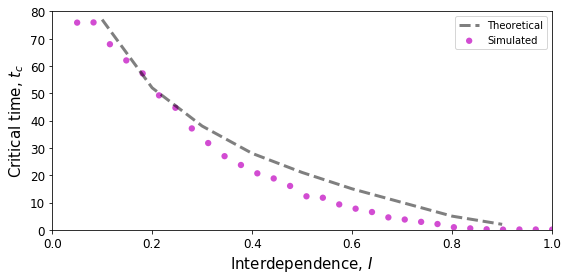

In [4]:
a = np.genfromtxt('phi_c_list.csv', delimiter=',')
b = np.genfromtxt('t_c_list.csv', delimiter=',')
phi_c_list = a[1,:]
I_list = a[0,:]
t_c_list = b[1,:]

plt.figure(figsize=(8,4))
plt.scatter(I_list,t_c_list, color='m', alpha=0.7, s=40, edgecolors='none', label='Simulated')
plt.plot(I_list_anly,t_c_anly, 'k', alpha=0.5, label='Theoretical',linewidth=3.0,linestyle='--')
plt.xlabel('Interdependence, $I$', fontsize=15)
plt.ylabel('Critical time, $t_c$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best')
plt.xlim(0,1)
plt.ylim(0,80)
plt.tight_layout()
plt.savefig('t_c.png',dpi=800,bbox_inches='tight')
plt.show()

## Snapshots of network aging

Corresponds to Figure S4 and the Supplementary Movie

- Blue nodes are live/functional
- Pink nodes are failed/dead

In [2]:
def make2DGrid (N):
    '''
    Builds a square 2D triangular lattice/grid network using the NetworkX package
    '''
    sN = int(round(np.sqrt(N)))
    #G=nx.grid_2d_graph(sN, sN)
    G=nx.triangular_lattice_graph(sN, sN)
    #G=nx.waxman_graph(N)
    #G=nx.random_geometric_graph(N, 0.15)
    A = nx.to_numpy_matrix(G)
    # networkx defaults to no self references (diagonal = 0)
    return (A)

N=120


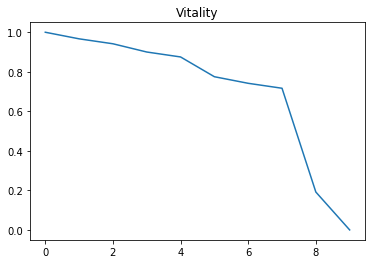

In [34]:
snapshot_deltas = 1

######
num_nets = 1
alpha = 10
r = 0
f = 0.025
N = 200
dependency = 0.6
######

d=0
f_thresh=0.1
weight_type='uniform'
check_type='none'
kinetic=1
P_check=0
e=0
cost_type=['basic']
costC=0
costR=0
costE=0
costD=0
costL=0, 
P_repl=0
costrepl=0
max_repl=1
repl_type='constant'
node_type='binary'
damage_type='uniform'
edge_type='binary'
f_edge=0
r_edge=0
std=0.3, 
P_ablate=0
costablate=0
ablate_type='constant'
repair_start=0
repair_end='none'
delay=0,
time_end='none'
save='no'
plot='yes'
write_inds='no'

# Init A and v for 2D grid network
A = make2DGrid(N)
v = np.ones(A.shape[0])
N = A.shape[0]
print ('N='+str(N))

# Initialize vector for number of nodes that the given is dependent on
num_neigh = np.sum(A,axis=0)

## Get positions using spring layout
nx_graph = nx.from_numpy_matrix(A)
pos=nx.spring_layout(nx_graph,dim=2,iterations=1000)#k=1.5*1/np.sqrt(N))

# Initialize replication counter vector
repl_v = np.zeros(N)

# Summary Lists
vitality = []
sz_cc = []
num_cc = []
h_fraction = []
m_fraction = []
f_effs = [f]

### check to see m fraction live nodes ==> check if theoretical assumption is m or m/phi
m_frac_live = []

i = 0
frame = 0
while i >= 0: # runs until all nodes broken

    # Gets weight and degree vectors
    degree_vec = getDegrees (A)
    weight_vec = getWeights (weight_type, A, v, degree_vec)

    vitality_i, interdependence_i = Analyze(v, f, r, i, weight_vec)
    vitality.append(vitality_i)
    
    # num / size of CC
    if np.mean(v) > 0 and np.mean(v) < 1:
        # cut down A to only have failed nodes
        f_idxs = np.where(v.flatten()==0)
        f_A = np.copy(A)
        f_A = f_A[:,f_idxs[0]]
        f_A = f_A[f_idxs[0],:]
        f_graph = nx.from_numpy_matrix(f_A)
        sz_cc_list = [len(c) for c in sorted(nx.connected_components(f_graph), key=len, reverse=True)]
        sz_cc_i = np.mean(sz_cc_list)
        sz_cc.append(sz_cc_i)
        num_cc_i = nx.number_connected_components(f_graph) # get number of CC using networkx
        num_cc.append(num_cc_i)
    elif np.mean(v) == 0:
        sz_cc.append(N)
        num_cc.append(1)
    elif np.mean(v) == 1:
        sz_cc.append(0)
        num_cc.append(0)
    else:
        raise Exception ('v is greater than 1 or less than 0')
    

    # Break if vitality lower than threshold
    if np.sum(v)/len(v) <= f_thresh or np.sum(v)==0: # stops when vitality passes threshold
        break

    # Stops data collection if time_end reaches
    if time_end != 'none' and i >= time_end:
        break

    # simulate stochastic damage
    A, v, f = Damage(A, v, f, damage_type, node_type, edge_type, f_edge, std, i)

    # Check and repair network
    if i >= repair_start:
        if repair_end != 'none':
            if i <= int(repair_end):
                cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                          node_type, edge_type, r_edge, std)
                cost_r = r
            else:
                cost_cr = 0
                cost_r = 0
        else:
            cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                          node_type, edge_type, r_edge, std)
            cost_r = r
    else:
        cost_cr = 0
        cost_r = 0

    # dependency-related failure
    if dependency > 0:
        keep_going = True
        counter = 0
        while keep_going is True:
            v_new = dependencyFail(A, v, num_neigh, dependency, equilibrate_failures=False)
            num_failed = 0
            for vidx, vn in enumerate(v_new):
                if vn != v[vidx]:
                    num_failed += 1
            if num_failed == 0:
                keep_going = False
            v = v_new
            counter += 1
            plt.figure(figsize=(10,10))
            # Network
            plt.subplot(221)
            plt.title('t='+str(i))
            nx_graph = nx.from_numpy_matrix(A)
            nx.draw_networkx(nx_graph, pos, cmap=plt.get_cmap('cool_r'), node_size=30, node_color=v, edge_color='#a0a3a1', alpha=0.5, with_labels=False)
            # Vitality
            plt.subplot(222)
            plt.plot(np.arange(1,len(vitality)+1,1),vitality,'k')
            plt.xlabel('Time, $t$')
            plt.ylabel(r'Vitality, $\phi$')
            plt.xlim(0,11)
            plt.ylim(-0.01,1.01)
            # Size CC
            plt.subplot(223)
            plt.plot(np.arange(1,len(sz_cc)+1,1),sz_cc,'k')
            plt.xlabel('Time, $t$')
            plt.ylabel('Average size of failed CC')
            plt.xlim(0,11)
            plt.ylim(0,N)
            # Num CC
            plt.subplot(224)
            plt.plot(np.arange(1,len(num_cc)+1,1),num_cc,'k')
            plt.xlabel('Time, $t$')
            plt.ylabel('Number of failed CC')
            plt.xlim(0,11)
            plt.ylim(0,N/5)
            plt.savefig('Figures/triangle_network_movie/frame'+str(frame).zfill(3)+'.png', dpi=400)
            plt.close()
            frame += 1
                
    i += 1
    
    # Take snapshot
    if i % snapshot_deltas == 0:
        # Network
        plt.figure(figsize=(10,10))
        plt.subplot(221)
        plt.title('t='+str(i))
        nx_graph = nx.from_numpy_matrix(A)
        nx.draw_networkx(nx_graph, pos, cmap=plt.get_cmap('cool_r'), node_size=30, node_color=v, edge_color='#a0a3a1', alpha=0.5, with_labels=False)
        # Vitality
        plt.subplot(222)
        plt.plot(np.arange(1,len(vitality)+1,1),vitality,'k')
        plt.xlabel('Time, $t$')
        plt.ylabel(r'Vitality, $\phi$')
        plt.xlim(0,11)
        plt.ylim(-0.01,1.01)
        # Size CC
        plt.subplot(223)
        plt.plot(np.arange(1,len(sz_cc)+1,1),sz_cc,'k')
        plt.xlabel('Time, $t$')
        plt.ylabel('Average size of failed CC')
        plt.xlim(0,11)
        plt.ylim(0,N)
        # Num CC
        plt.subplot(224)
        plt.plot(np.arange(1,len(num_cc)+1,1),num_cc,'k')
        plt.xlabel('Time, $t$')
        plt.ylabel('Number of failed CC')
        plt.xlim(0,11)
        plt.ylim(0,N/5)
        plt.savefig('Figures/triangle_network_movie/frame'+str(frame).zfill(3)+'.png', dpi=400)
        #plt.show()
        plt.close()
        frame += 1

        
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('t='+str(i))
nx_graph = nx.from_numpy_matrix(A)
nx.draw_networkx(nx_graph, pos, cmap=plt.get_cmap('cool_r'), node_size=30, node_color=v, edge_color='#a0a3a1', alpha=0.5, with_labels=False)
# Vitality
plt.subplot(222)
plt.plot(np.arange(1,len(vitality)+1,1),vitality,'k')
plt.xlabel('Time, $t$')
plt.ylabel(r'Vitality, $\phi$')
plt.xlim(0,11)
plt.ylim(-0.01,1.01)
# Size CC
plt.subplot(223)
plt.plot(np.arange(1,len(sz_cc)+1,1),sz_cc,'k')
plt.xlabel('Time, $t$')
plt.ylabel('Average size of failed CC')
plt.xlim(0,11)
plt.ylim(0,N)
# Num CC
plt.subplot(224)
plt.plot(np.arange(1,len(num_cc)+1,1),num_cc,'k')
plt.xlabel('Time, $t$')
plt.ylabel('Number of failed CC')
plt.xlim(0,11)
plt.ylim(0,N/5)
plt.savefig('Figures/triangle_network_movie/frame'+str(frame).zfill(3)+'.png', dpi=400)
plt.close()
        
plt.figure()
plt.title('Vitality')
plt.plot(np.arange(len(vitality)), vitality)
plt.show()

In [38]:
i=8 # change this to last time point of previous cell
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('t='+str(i))
nx_graph = nx.from_numpy_matrix(A)
nx.draw_networkx(nx_graph, pos, cmap=plt.get_cmap('cool_r'), node_size=30, node_color=v, edge_color='#a0a3a1', alpha=0.5, with_labels=False)
# Vitality
plt.subplot(222)
plt.plot(np.arange(1,len(vitality)+1,1),vitality,'k')
plt.xlabel('Time, $t$')
plt.ylabel(r'Vitality, $\phi$')
plt.xlim(0,11)
plt.ylim(-0.01,1.01)
# Size CC
plt.subplot(223)
plt.plot(np.arange(1,len(sz_cc)+1,1),sz_cc,'k')
plt.xlabel('Time, $t$')
plt.ylabel('Average size of failed CC')
plt.xlim(0,11)
plt.ylim(0,N)
# Num CC
plt.subplot(224)
plt.plot(np.arange(1,len(num_cc)+1,1),num_cc,'k')
plt.xlabel('Time, $t$')
plt.ylabel('Number of failed CC')
plt.xlim(0,11)
plt.ylim(0,N/5)
plt.savefig('Figures/triangle_network_movie/frame'+str(frame).zfill(3)+'.png', dpi=400)
#plt.show()
plt.close()

### Make Movie using cv2

In [36]:
import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob('./Figures/triangle_network_movie/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('movie_collapse.avi',cv2.VideoWriter_fourcc(*'M','J','P','G'), 5, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()